In [ ]:
# Julia Joseph

In [ ]:
# Standard Headers
# You may add additional headers here if needed
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import io

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# print your pandas version
pd.__version__

'1.3.5'

# Assignment 1: Data Preprocessing

## Part 1: Data Cleaning, Exploration, and Feature Engineering

For this part of the assignment you'll be using the 1994 Adult Census Income dataset (`adult.csv`) collected by Ronny Kohavi and Barry Becker. It contains 32,561 records with 14 features.

Q1. Read the dataset from `adult.csv` into a Pandas dataframe. You can find more on reading CSV (Comma Separated Values) data as a Pandas dataframe [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html).

**Important:**
* Notice in the csv file that `?` is used to indicate missing values. We want all of the missing values to be represented by NaNs in the dataframe. Make sure that all of the `?` are converted to `NaN` in your dataframe!
* Also, set the `skipinitialspace` parameter to `True`. (This will be necessary for the `map()` function to work later in the assignment.)

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['adult17.csv']), skipinitialspace = True, na_values='?')

Saving adult17.csv to adult17 (5).csv


# New Section

Q2. Start by looking for missing values. How many missing values are there in this dataset?

In [ ]:
missing_values = df.isnull().sum().sum()

In [ ]:
print("Missing Values: ", missing_values)# your code goes here

Missing Values:  4290


Q3. Clean up some of the missing values.
* Drop all of the records from the dataset that are missing `workclass` or `occupation`.
* For records missing values in `native-country`, impute those by using a "forward fill." This will fill in the missing value with the same value as the previous record.
* For records missing `age`, leave those as-is for now. We will do a similar-case imputation on them later!

Print something to show that there are no longer missing values in `workclass`, `occupation`, or `native-country`.

In [ ]:
df = df.dropna(subset = ['workclass', 'occupation'])

In [ ]:
df['native-country'].fillna(method = 'ffill', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
workclassmissing = df['workclass'].isna().sum()
occupationmissing = df['occupation'].isna().sum()
nativecountrymissing = df['native-country'].isna().sum()
print("workclass missing values:", workclassmissing)
print("occupation missing values:", occupationmissing)
print("native country missing values:", nativecountrymissing)

workclass missing values: 0
occupation missing values: 0
native country missing values: 0


Q4. Explore the data:
* How is the dataset distributed between people who make <=50K income and those who make >50K income?
* How is the dataset distributed between males & females?
* Create a plot to show the distribution of the datset by `education`.
* Create a plot to show the distribution of the ages in the dataset.

income
<=50K    23068
>50K      7650
dtype: int64
sex
Female     9930
Male      20788
dtype: int64
education
Assoc-acdm      1020
Assoc-voc       1321
Bachelors       5182
Doctorate        398
Elem-school     1032
HS-grad         9968
High-school     2743
Masters         1675
Preschool         46
Prof-school      558
Some-college    6775
dtype: int64


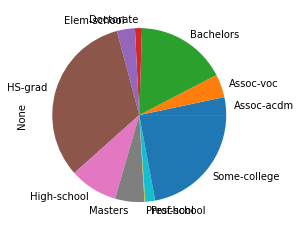

In [ ]:

income = df.groupby('income')
print(income.size())
sex = df.groupby('sex')
print(sex.size())
groups = df.groupby('education')
print(groups.size()) # groups.size() is a Series object
groups.size().plot.pie()


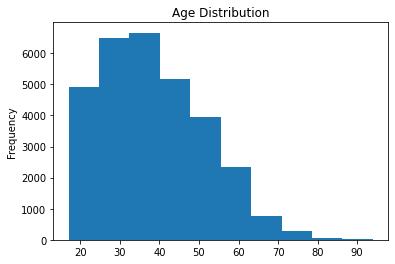

In [ ]:
agedist = df['age']
agedist.plot(kind='hist', title = 'Age Distribution')

Q5. Create a plot to determine if there are any outliers in the  `capital-gain` column.  
Answer as a comment: What values would you consider to be outliers in this column? Explain why.

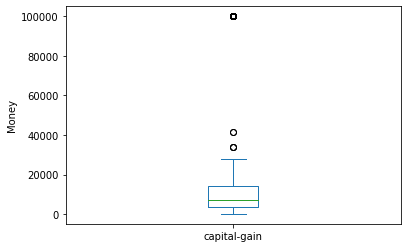

In [ ]:

#Traditionally I would consider any value outisde the upper and lower extremes
# an outlier as indicated by the whiskers
# Since there were a lot of data points that were 0 I did not include those
# by using the mask function. Thus, the outliers would be the datapoints at 30000,
# 40000 and 100000


capitalgain = df['capital-gain']
capitalgain.mask(capitalgain == 0).plot.box(ylabel = "Money")

Q6. Using the `groupby()` method for dataframes [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html), group the data by  `marital-status`.

Display each marital status along with it's mean age, in sorted order from least to greatest.

In [ ]:
df.groupby(['marital-status'])['age'].mean().sort_values()

marital-status
Never-married            28.471218
Married-AF-spouse        31.250000
Separated                39.507821
Married-spouse-absent    40.290488
Married-civ-spouse       42.770487
Divorced                 42.896333
Widowed                  57.742857
Name: age, dtype: float64

Q7. Now fill in those missing age values, using similar case imputation. For each missing age, fill it in with the **median** age of that person's marital-status category. Use **median** rather than mean for this, so that we only use whole numbers for ages. Display the head of the dataframe.

In [ ]:
df.groupby(['marital-status'])['age'].apply(func = lambda x: df.fillna(x.median(),inplace=True))
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q8. Display everyone who is over 90 years old.  

In [ ]:
print(df[df['age'] > 90])

        age  workclass    education  education-num      marital-status  \
222    91.0    Private      HS-grad              9       Never-married   
5272   94.0    Private  High-school              5       Never-married   
32277  91.0    Private      HS-grad              9             Widowed   
32367  93.0  Local-gov  Elem-school              4  Married-civ-spouse   

            occupation   relationship   race     sex  capital-gain  \
222      Other-service  Not-in-family  Black    Male             0   
5272      Adm-clerical  Not-in-family  White  Female             0   
32277     Adm-clerical      Unmarried  White  Female             0   
32367  Protective-serv        Husband  White    Male          2653   

       capital-loss  hours-per-week native-country income  
222            2206              40  United-States  <=50K  
5272              0              40  United-States  <=50K  
32277             0              25  United-States  <=50K  
32367             0              40  U

Q9. Create a scatter plot between `age` and `hours-per-week` **for only the first 100 datapoints in the dataset.**  
Place `age` on the X axis. Color each datapoint according to their income - one color for those that make <=50K, and another color for those that make >50K.

Answer as a comment: What observations or insights can you make by looking at this plot?

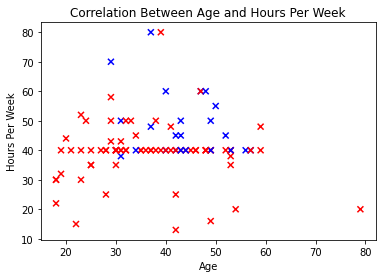

In [ ]:

colors = {'<=50K':'red', '>50K':'blue'}
newdf = df.loc[0:99]
plt.scatter(newdf['age'], newdf['hours-per-week'],
            c = newdf['income'].apply(lambda x: colors[x]),
            marker = 'x')
plt.xlabel('Age')
plt.ylabel('Hours Per Week')
plt.title("Correlation Between Age and Hours Per Week")
plt.show()
#  It seem like for the majority of the data individuals made more money between
# ages 30 and 50 although there is an outlier who;s around 75 years old. Additionally
#it seems that those who made above 50k were working 40 or more hours a week even though
# those who made less than 50k had more variability in the hours worked as the range
# for those who made less than 50k were between 10 amd 80.

Q10. Feature engineering: Using the dictionary provided below, create a new column called `continent` using the existing `native-country` column in the dataframe. You may want to look at the `map()` method for Series [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html). Display the head of the new dataframe.

In [ ]:
# Please don't change this cell!!
continent_dict = {
    'Cambodia' : 'Asia',
    'Canada' : 'North-America',
    'China' : 'Asia',
    'Columbia' : 'South-America',
    'Cuba' : 'North-America',
    'Dominican-Republic' : 'North-America',
    'Ecuador' : 'South-America',
    'El-Salvador' : 'North-America',
    'England' : 'Europe',
    'France' : 'Europe',
    'Germany' : 'Europe',
    'Greece' : 'Europe',
    'Guatemala' : 'North-America',
    'Haiti' : 'North-America',
    'Holand-Netherlands' : 'Europe',
    'Honduras' : 'North-America',
    'Hong' : 'Asia',
    'Hungary' : 'Europe',
    'India' : 'Asia',
    'Iran' : 'Asia',
    'Ireland' : 'Europe',
    'Italy' : 'Europe',
    'Jamaica' : 'North-America',
    'Japan' : 'Asia',
    'Laos' : 'Asia',
    'Mexico' : 'North-America',
    'Nicaragua' : 'North-America',
    'Outlying-US(Guam-USVI-etc)' : 'North-America',
    'Peru' : 'South-America',
    'Philippines' : 'Asia',
    'Poland' : 'Europe',
    'Portugal' : 'Europe',
    'Puerto-Rico' : 'North-America',
    'Scotland' : 'Europe',
    'South' : 'Asia',
    'Taiwan' : 'Asia',
    'Thailand' : 'Asia',
    'Trinadad&Tobago' : 'South-America',
    'United-States' : 'North-America',
    'Vietnam' : 'Asia',
    'Yugoslavia' : 'Europe',
}

In [ ]:
# You will want to create a deep copy of the initial dataframe object
# so that you can run this cell multiple times without errors.
adult_data_copy = df.copy()
adult_data_copy['continent'] = adult_data_copy['native-country'].map(continent_dict)
adult_data_copy.head()

# add the new column to adult_data_copy
# your code goes here

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,continent
0,39.0,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,North-America
1,42.0,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,North-America
2,38.0,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,North-America
3,53.0,Private,High-school,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,North-America
5,28.0,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,North-America


Q11. Plot a bar graph showing the average age of adults from each continent, and show the standard deviations on the same graph.

An example bar plot with standard deviation bars:
<img src="imgs/screen5.png" width=200>

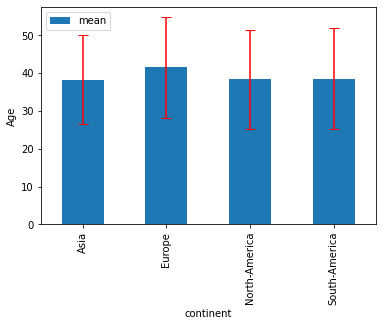

In [ ]:
grouped_data = adult_data_copy.groupby('continent').describe()
age_grouped_data = grouped_data['age']
age_grouped_data = age_grouped_data.loc[:,['mean', 'std']]
age_grouped_data.plot(kind = 'bar', y = 'mean', ylabel = 'Age', yerr= 'std',
                      ecolor = 'red', capsize = 5)





Q12. To reduce the dimensionality of this dataset via feature selection, which attribute or attributes would you eliminate? Explain why as a comment.

In [ ]:
#There are several features we could eliminate depending on the goal of the dataset.
#In an instance where you would try to group individuals based on the the country
#and thier work statistics, one's relationship status is not relevant
#thus the marital status and relationship columns would not be relevant and thus
#could be dropped

## Part 2: Data Scaling and Dimensionality Reduction

For this part you'll be using a subset of the leaf dataset created by professors from University of Porto, Portugal. This dataset consists in a collection of shape and texture features extracted from digital images of leaf specimens originating from a total of 40 different plant species, but for the purpose of this assignment we're only going to consider 4 plant species.

<img src="imgs/screen4.png">

Q13. Read the dataset from `leaf.csv` into a dataframe. Display the head of the dataframe.

In [ ]:

uploaded = files.upload()
leaf = pd.read_csv(io.BytesIO(uploaded['leaf.csv']), skipinitialspace = True, na_values=' ')
leaf.head()
missing_values = leaf.isnull().sum().sum()
print(missing_values)

Saving leaf.csv to leaf (6).csv
5


Q14. Eccentricity of the leaf is a measure of how much the shape of the leaf varies from a perfect circle. Unfortunately the dataset is missing values in the `eccentricity` column. As a comment, explain how you would handle these missing values, then go ahead and handle them (in code). Display the resulting head of the dataframe.

In [ ]:
leaf["eccentricity"] = leaf.groupby("class").transform(lambda x: x.fillna(x.mean()))["eccentricity"]
leaf.head()
# I handled these missing values by filling th values in with the mean of each
# class of leaf



,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
0,1,0.415627,1.0118,0.63010,0.57134,0.81053,0.16187,0.111150,2.248600,0.027309,0.088889,0.007839,0.002273,0.000175,0.86000
1,4,0.995120,10.3770,0.90564,0.92135,0.99825,0.17941,0.016647,0.050433,0.020400,0.071662,0.005109,0.001266,0.000170,0.71514
2,3,0.192870,1.0551,0.25044,0.93641,0.99474,0.47284,0.019693,0.070581,0.055935,0.130300,0.016694,0.004583,0.000440,1.41110
3,1,0.522120,1.1191,0.70988,0.50678,0.64912,0.14120,0.131920,3.167400,0.025478,0.085964,0.007336,0.002179,0.000149,0.82809
4,3,0.332540,1.1208,0.27473,0.93625,0.99474,0.49836,0.024394,0.108300,0.108090,0.168820,0.027709,0.005981,0.001234,2.48660


'''I would fill in the missing eccentricity values based on the mean of the
average eccentricity based on the leaf class. '''

Q15. Data scaling: Standardize the features in the `leaf_data` dataset so that all of the features are on the same scale.

* Use `sklearn.preprocessing.StandardScaler` to standardize the dataset’s features. Call `.fit_transform` to calculate the scaled data (fit) and replace the existing data with the scaled data (transform).
* Note that `fit_transform` returns a numpy array. Put your scaled data back into a DataFrame by doing something like this (subsitute your variable names): `scaled_data = DataFrame(numpy_array_data, columns=leaf_data.columns)`
* Display something to show that the data has been scaled correctly (the head of the data frame, *and/or* the mean of each column which should be ~0, *and/or* the standard deviation of each column which should be ~1.)

In [ ]:
scaler = StandardScaler()
numpy_array_data = scaler.fit_transform(leaf)
numpy_array_data

array([[-1.19697474e+00, -6.02630367e-01, -5.31196216e-01,
         3.95212317e-01, -1.26277252e+00, -4.41094743e-01,
        -8.75478159e-01,  1.11610843e+00,  8.90912682e-01,
        -3.58757679e-01, -2.76976138e-01, -3.66060860e-01,
        -3.35186030e-01, -4.46736776e-01, -2.63255855e-01],
       [ 1.47056897e+00,  1.71495442e+00,  1.44759714e+00,
         1.41685414e+00,  5.59788687e-01,  7.14452666e-01,
        -8.09227375e-01, -7.40952972e-01, -6.88900725e-01,
        -5.79955761e-01, -7.34593240e-01, -6.74960789e-01,
        -8.13313960e-01, -4.56439210e-01, -5.33338790e-01],
       [ 5.81387733e-01, -1.49350768e+00, -5.22047265e-01,
        -1.01248361e+00,  6.38208652e-01,  6.92846170e-01,
         2.99094599e-01, -6.81096575e-01, -6.74420442e-01,
         5.57730423e-01,  8.23063442e-01,  6.35813139e-01,
         7.61190316e-01,  4.31250554e-02,  7.64237629e-01],
       [-1.19697474e+00, -1.76728436e-01, -5.08524567e-01,
         6.91019041e-01, -1.59894735e+00, -1.43468577

In [ ]:
leaf = pd.DataFrame(numpy_array_data, columns=leaf.columns)
leaf.head().describe()

,class,eccentricity,aspect-ratio,elongation,solidity,stochastic-convexity,isoperimetric-factor,maximal-indentation-depth,lobedness,average-intensity,average-contrast,smoothness,third-moment,uniformity,entropy
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.047879,-0.298567,-0.124467,0.113636,-0.205269,0.044873,-0.388735,0.125919,0.086306,0.285832,0.260625,0.210771,0.131484,0.031134,0.482867
std,1.192962,1.224173,0.878864,1.055059,1.125552,0.963501,0.674697,1.101053,1.061991,1.172996,1.059339,1.059840,0.927431,0.857147,1.373499
min,-1.196975,-1.493508,-0.531196,-1.012484,-1.598947,-1.434686,-0.953551,-0.740953,-0.688901,-0.579956,-0.734593,-0.674961,-0.813314,-0.496638,-0.533339
25%,-1.196975,-0.934921,-0.522047,-0.922422,-1.262773,-0.441095,-0.875478,-0.681097,-0.674420,-0.417379,-0.354676,-0.423053,-0.379852,-0.456439,-0.322750
50%,0.581388,-0.602630,-0.508525,0.395212,0.559789,0.692846,-0.809227,-0.588718,-0.647312,-0.358758,-0.276976,-0.366061,-0.335186,-0.446737,-0.263256
75%,0.581388,-0.176728,-0.508165,0.691019,0.637376,0.692846,0.299095,1.116108,0.890913,0.557730,0.823063,0.635813,0.761190,0.043125,0.764238
max,1.470569,1.714954,1.447597,1.416854,0.638209,0.714453,0.395487,1.524256,1.551250,2.227521,1.846307,1.882116,1.424579,1.512359,2.769444


Q16. Dimensionality reduction using PCA

* Use `sklearn.decomposition.PCA` to perform PCA on the **scaled** data.
* Set `n_components` to 0.95 and `svd_solver` to 'full', so that the PCA will reduce the number of dimensions to however many dimensions are necessary to retain 95% of the variance.
* Use `.fit_transform` to calculate the dimensionality reduction (fit) and to replace the existing data with the transformed data (transform).
* Note that `fit_transform` returns a numpy array. Put the transformed data back into a Pandas DataFrame by doing something like this (subsitute your variable names): `pca_data = DataFrame(numpy_array_data)`
* Show the head of the resulting DataFrame to make sure the dimensionality has actually been reduced.

In [ ]:
pca = PCA(n_components=.95, svd_solver='full')
numpy_array = pca.fit_transform(leaf)
leaf = pd.DataFrame(numpy_array)
leaf.head()

,0,1,2,3
0,-1.829002,-1.888197,0.022065,0.091680
1,-1.376523,3.246110,-1.221339,-0.238521
2,2.412789,-0.210715,0.507290,1.111356
3,-2.648967,-2.455226,-0.458040,-0.219275
4,4.910001,-1.109855,-1.218397,-0.154251
